In [13]:
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['close']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
# read data from csv file
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv("ARMH.csv", 
                   parse_dates = ['Date'],
                   index_col = 'Date',
                   date_parser = dateparse)
print data.info()
print "\n\n data shape: ", data.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2466 entries, 2016-09-05 to 2007-03-26
Data columns (total 8 columns):
Open                       2466 non-null float64
High                       2466 non-null float64
Low                        2466 non-null float64
Close                      2466 non-null float64
Volume                     2466 non-null int64
Price to Earnings Ratio    1902 non-null float64
Price to Sales Ratio       1902 non-null float64
Unnamed: 8                 0 non-null float64
dtypes: float64(7), int64(1)
memory usage: 173.4 KB
None


 data shape:  (2466, 8)


In [15]:
# drop last coloumn
data.drop(data.columns[[7]], axis = 1, inplace = True)

data = data.iloc[::-1]

print data.info()
print data.shape
print data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2466 entries, 2007-03-26 to 2016-09-05
Data columns (total 7 columns):
Open                       2466 non-null float64
High                       2466 non-null float64
Low                        2466 non-null float64
Close                      2466 non-null float64
Volume                     2466 non-null int64
Price to Earnings Ratio    1902 non-null float64
Price to Sales Ratio       1902 non-null float64
dtypes: float64(6), int64(1)
memory usage: 154.1 KB
None
(2466, 7)
            Open  High   Low  Close  Volume  Price to Earnings Ratio  \
Date                                                                   
2007-03-26  7.90  7.90  7.77   7.89  237167                      NaN   
2007-03-27  7.71  7.76  7.67   7.73  151323                      NaN   
2007-03-28  7.70  7.79  7.67   7.71  150269                      NaN   
2007-03-29  7.95  7.95  7.77   7.80  648457                      NaN   
2007-03-30  7.77  7.89  7.75   7.85 

In [16]:
close = data['Close']

print close.head(10)

Date
2007-03-26    7.89
2007-03-27    7.73
2007-03-28    7.71
2007-03-29    7.80
2007-03-30    7.85
2007-04-02    7.84
2007-04-03    7.83
2007-04-04    7.82
2007-04-05    7.77
2007-04-06    7.77
Name: Close, dtype: float64


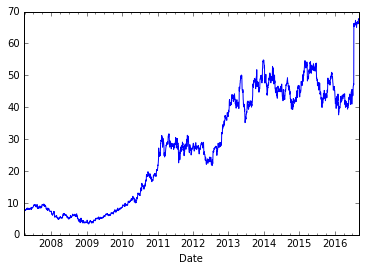

In [17]:
close.plot()

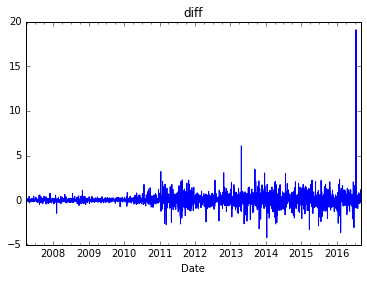

In [18]:
close.diff().plot(title = 'diff')

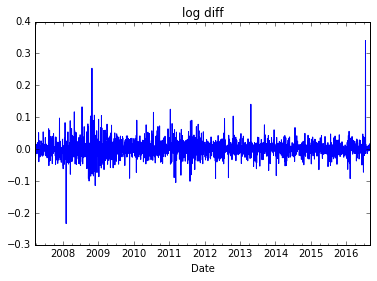

In [19]:
ts_log = np.log(close)
ts_log.diff().plot(title = 'log diff')

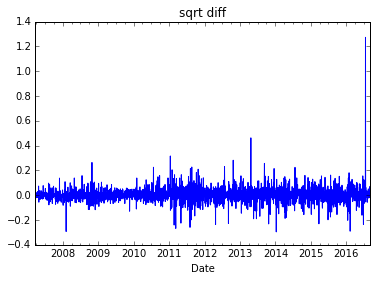

In [20]:
ts_sqrt = np.sqrt(close)
ts_sqrt.diff().plot(title = 'sqrt diff')

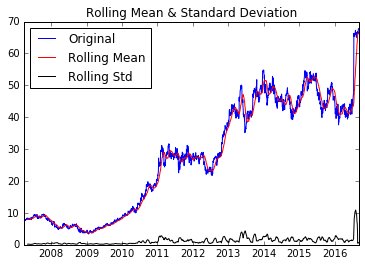

Test Statistics                 -0.102832
p-value                          0.949156
#Lags Used                       0.000000
Number of Observation Used    2465.000000
Critical Value (5%)             -2.862713
Critical Value (1%)             -3.433006
Critical Value (10%)            -2.567395
dtype: float64


In [21]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts):
    rol_mean = ts.rolling(window = 30, center = False).mean()
    rol_std = ts.rolling(window = 30, center = False).std()
    
    org = plt.plot(ts, color = 'blue', label = 'Original')
    mean = plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rol_std, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    # Dicky-Fuller Test
    dftest = adfuller(ts, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '#Lags Used', 'Number of Observation Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print dfoutput

test_stationarity(close)

Ref:
 1. https://ionides.github.io/531w16/midterm_project/project21/531-Midterm_Project.html